# Turbine Map Plotting Tool (Variable Geometry)

In [1]:
"""
===-*- Turbine Map Plotting Tool Variable Geometry -*-===
=====-*- General -*-=====
Copyright (c) makkiblog.com
MIT License 
coding: utf-8

===-*- VERSION -*-===
v0.1 Initial Release
vvvCODEvvv
"""

#Setup
import numpy as np
from pylab import *
from scipy import signal
from scipy import interpolate
from scipy import integrate
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D
import pandas as pd
import os
import sys
import configparser
import codecs
import csv
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

#mpl.rcParams['agg.path.chunksize'] = 100000

In [2]:
#Setup (Visual)
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style('whitegrid')

plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams['figure.facecolor'] = 'white'

#colormap settings
#define legend colormap
cmap = plt.cm.gist_ncar
cmap2 = plt.cm.cool
def colormap(input):
    custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
        Line2D([0], [0], color=cmap(.2), lw=4),
        Line2D([0], [0], color=cmap(.4), lw=4),
        Line2D([0], [0], color=cmap(.6), lw=4),
        Line2D([0], [0], color=cmap(.8), lw=4),
        Line2D([0], [0], color=cmap(1.), lw=4)]
    custom_lines2 = [Line2D([0], [0], color=cmap2(0.), lw=4),
        Line2D([0], [0], color=cmap2(.2), lw=4),
        Line2D([0], [0], color=cmap2(.4), lw=4),
        Line2D([0], [0], color=cmap2(.6), lw=4),
        Line2D([0], [0], color=cmap2(.8), lw=4),
        Line2D([0], [0], color=cmap2(1.), lw=4)]
    if input ==1:
        return custom_lines
    if input ==2:
        return custom_lines2
    else:
        return custom_lines
        
    

### SETTINGS

In [3]:
#csv data読み込み用
def csv_df(input):
    return pd.read_csv('./Datas/' + input+'.csv', header=0,index_col=False)

#text data読み込み用
def txt_df(input):   
    return pd.read_table('./Datas/' + input+'.txt', header=0,index_col=False)


#Standard methond by rpm and vane position discrimination
def text_plot_ind1(case, vanename,rpmname,flowname,ername,etaname):
    custom_lines=colormap(1)
    custom_lines2=colormap(2)
    #import colormap.custom_lines as customlines
    #import colormap.custom_lines2 as customlines2
    df_b = txt_df(case)
    vanepos = list()
    rpms = list()
    mapdata = list()
    mapcounts=list()
    count=0
    for g, data in df_b.groupby([vanename,rpmname]):
        mapdata.append(data)
        vanepos.append(data[vanename].iloc[0])
        rpms.append(data[rpmname].iloc[0])
        mapcounts.append(count)
        count+=1
    maxrpmcorr=max(rpms)
    print(maxrpmcorr)

    clf()
    plt.title(case)
    plt.ylabel('Flow [g/s]')
    plt.xlabel('Pressure Ratio')
    name = str(case)
    plt.legend(custom_lines, ['0%', '20%', '40%','60%','80%','100%'], title="Vane %") 
    for i in mapcounts:
        xdata = mapdata[i][ername]  #Specify any parameter
        ydata = mapdata[i][flowname] #Specify any parameter
        plot(xdata,ydata,color=cmap(vanepos[i]))
    plt.savefig('./Datas/' + name + '_ER_Flow_1.png', dpi=300)

    clf()
    plt.figure(0)
    plt.title(case)
    plt.ylabel('Eta %')
    plt.xlabel('Flow [g/s]')
    name = str(case)
    plt.legend(custom_lines, [maxrpmcorr*0., maxrpmcorr*0.2, maxrpmcorr*0.4,maxrpmcorr*0.6,maxrpmcorr*0.8,maxrpmcorr*1.], title="rpm corr") 
    for i in mapcounts:
        xdata = mapdata[i][flowname]  #Specify any parameter
        ydata = mapdata[i][etaname]  #Specify any parameter
        plot(xdata,ydata,color=cmap(rpms[i]/maxrpmcorr))
    plt.savefig('./Datas/' + name + '_Flow_Eta_1.png', dpi=300)

    
    
    #Plot 2 axes settings
    clf()
    ax1=plt.figure(0).add_subplot(111)
    plt.title(case)
    ax2 = ax1.twinx() 
    ax1.set_xlabel('Flow [g/s]')
    ax1.set_ylabel('Pressure Ratio')
    ax1.set_ylim(1.0,4.0)
    ax2.set_ylabel('EtaT')
    ax2.set_ylim(0.25,0.85)
    name = str(case)
    
    #Legend
    leg1 = ax1.legend(custom_lines2, ['0%', '20%', '40%','60%','80%','100%'], title="PRT, Vane %", bbox_to_anchor=(1.24,0.9)) 
    leg2 = ax2.legend(custom_lines, [maxrpmcorr*0., maxrpmcorr*0.2, maxrpmcorr*0.4,maxrpmcorr*0.6,maxrpmcorr*0.8,maxrpmcorr*1.], title="EtaT, rpm corr", bbox_to_anchor=(1.07,0.5))
    ax2.grid(None, axis='y')
    
    #Set graph size
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    ax2.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    
    for i in mapcounts:
        xdata = mapdata[i][flowname]  
        ydata = mapdata[i][ername]
        y2data = mapdata[i][etaname]
        ax1.plot(xdata,ydata,color=cmap2(vanepos[i]),linewidth=0.5)
        ax2.plot(xdata,y2data,color=cmap(rpms[i]/maxrpmcorr),linewidth=0.75)
    plt.savefig('./Datas/' + name + '_ER_Flow_Eta1.png', dpi=300)

#syntax: (case_name, notes to add to tile, start position, end position, compare option'y' for yes, shift position for compare, lines jump)    
def text_plot_ind2(case,vanename,rpmname,flowname,ername,etaname,note,start,end,compare,shift,jump):
    custom_lines=colormap(1)
    custom_lines2=colormap(2)
    df_b = txt_df(case)
    vanepos = list()
    rpms = list()
    mapdata = list()
    for g, data in df_b.groupby([vanename,rpmname]):
        mapdata.append(data)
        vanepos.append(data[vanename].iloc[0])
        rpms.append(data[rpmname].iloc[0])
    maxrpmcorr=max(rpms)

    #Plot 2 axes settings
    clf()
    ax1=plt.figure(0).add_subplot(111)

    ax2 = ax1.twinx() 
    ax1.set_xlabel('Flow [g/s]')
    ax1.set_ylabel('Pressure Ratio')
    ax1.set_ylim(1.0,3.5)
    ax2.set_ylabel('EtaT')
    ax2.set_ylim(0.55,0.85)
    name = str(case)
    
    #Legend
    #leg1 = ax1.legend(custom_lines2, ['0%', '20%', '40%','60%','80%','100%'], title="PRT, Vane %", bbox_to_anchor=(1.24,0.9)) 
    leg2 = ax2.legend(custom_lines, [maxrpmcorr*0., maxrpmcorr*0.2, maxrpmcorr*0.4,maxrpmcorr*0.6,maxrpmcorr*0.8,maxrpmcorr*1.], title="rpm corr", bbox_to_anchor=(1.25,0.5))
    ax2.grid(None, axis='y')
    
    #Set graph size
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    ax2.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    
    j=start
    while j < end:
        xdata = mapdata[j][flowname]  
        ydata = mapdata[j][ername]
        y2data = mapdata[j][etaname]
        ax1.plot(xdata,ydata,color=cmap(rpms[j]/maxrpmcorr),linewidth=1.0)
        ax2.plot(xdata,y2data,color=cmap(rpms[j]/maxrpmcorr),linewidth=1.0)
        y2list = y2data.tolist()
        ylist=ydata.tolist()
        xlist=xdata.tolist()
        etamax=max(y2list)
        flowmax=max(xlist)
        PRTatEM=ylist[y2list.index(etamax)]
        FlowatEM=xlist[y2list.index(etamax)]
        
        print(rpms[j])
        print(etamax)
        print(PRTatEM)
        print(FlowatEM)
        
        #ax1.plot([0,FlowatEM],[PRTatEM,PRTatEM],color="Blue",linewidth=0.5, linestyle='dashed')
        #ax2.plot([FlowatEM,flowmax+0.02],[etamax,etamax],color="Green",linewidth=0.5, linestyle='dashed')
        #ax2.plot([FlowatEM,FlowatEM],[0,etamax],color="Blue",linewidth=0.5, linestyle='dashed')

        if compare=='y':
            etabase=y2list[shift]
            flowbase=xlist[shift]
            PRTbase=ylist[shift]
            ax1.plot([0,flowbase],[PRTbase,PRTbase],color="Blue",linewidth=0.7, linestyle='dashed')
            ax2.plot([flowbase,flowmax+0.02],[etabase,etabase],color="Green",linewidth=0.7, linestyle='dashed')
            ax2.plot([flowbase,flowbase],[0,etabase],color="Blue",linewidth=0.7, linestyle='dashed')


        j+=jump #change jumping range
    ax1.set_xlim(0,flowmax+0.02)
    plt.title(case+' Vane Pos=:'+str(vanepos[j-1]) )
    plt.savefig('./Datas/' + name + '_ER_Flow_Eta2_'+note+'_.png', dpi=300)


#Print 3D plot
def text_plot_ind3(case, vanename,rpmname,flowname,ername,etaname,note,xang,yang):
    custom_lines=colormap(1)
    df_b = txt_df(case)
    name = str(case)
    vanepos = list()
    rpms = list()
    mapdata = list()
    mapcounts=list()
    count=0
    for g, data in df_b.groupby([vanename,rpmname]):
        mapdata.append(data)
        vanepos.append(data[vanename].iloc[0])
        rpms.append(data[rpmname].iloc[0])
        mapcounts.append(count)
        count+=1
    maxrpmcorr=max(rpms)
    
    xdata=list()
    ydata=list()
    zdata=list()
    rpmdata=list()
    j=0
    while j < len(mapcounts):
        xtmp = mapdata[j][flowname].to_list()
        ytmp = mapdata[j][ername].to_list()
        ztmp = mapdata[j][etaname].to_list()
        rpmtmp = mapdata[j][rpmname].to_list()
        xdata.append(xtmp)
        ydata.append(ytmp)
        zdata.append(ztmp)
        rpmdata.append(rpmtmp)
        j+=1
    
    
    clf()
    fig=plt.figure(figsize=(12,12))
    ax=fig.add_subplot(111,projection='3d')
    ax.view_init(xang,yang)
    ax.set_title("PRT-Flow")
    ax.set_xlabel("Flow [g/s]")
    ax.set_ylabel("PRT")
    ax.set_zlabel("rpm")   
    ax.legend(loc="best")
    leg1=ax.legend(custom_lines, ['0%', '20%', '40%','60%','80%','100%'], title="PRT, Vane %") 
    k=0
    for k in mapcounts:
        ax.plot(xdata[k],ydata[k],rpmdata[k],color=cmap(vanepos[k]),linewidth=0.7)
    plt.savefig('./Datas/' + name + '_PRT_Flow_3D'+note+'_.png', dpi=300)
    
    clf()
    fig=plt.figure(figsize=(12,12))
    ax=fig.add_subplot(111,projection='3d')
    ax.view_init(xang, yang)
    ax.set_title("PRT-Flow Eta")
    #ax.set_xlabel("Flow [g/s]")
    #ax.set_ylabel("PRT")
    #ax.set_zlabel("Eta")
    ax.legend(loc="best")
    leg2=ax.legend(custom_lines, [maxrpmcorr*0., maxrpmcorr*0.2, maxrpmcorr*0.4,maxrpmcorr*0.6,maxrpmcorr*0.8,maxrpmcorr*1.], title="rpm corr")
    k=0
    for k in mapcounts:
        ax.plot(xdata[k],ydata[k],zdata[k],color=cmap(rpms[k]/maxrpmcorr),linewidth=0.8)
    plt.savefig('./Datas/' + name + '_ER_Flow_Eta3_3D'+note+'_.png', dpi=300)
    

    X = np.empty(150)
    Y = mapdata[0][ername].to_list()
    Z = mapdata[0][etaname].to_list()
    j=1
    while j < len(mapcounts):
        xtmp = mapdata[j][flowname].to_list()
        ytmp = mapdata[j][ername].to_list()
        ztmp = mapdata[j][etaname].to_list()
        X=np.append(X,xtmp,axis=0)
        Y=np.append(Y,ytmp,axis=0)
        Z=np.append(Z,ztmp,axis=0)
        #rpmdata.append(rpmtmp)
        j+=1
    print(X)
    clf()
    fig=plt.figure(figsize=(16,16))
    ax=fig.add_subplot(111)
    ax.plot()

    
#Alternate mapping method with out discrimination
def text_plot_all(case,vanename,rpmname,flowname,ername,etaname):
    custom_lines=colormap(1)
    df_b = txt_df(case)
    clf()
    plt.figure()   
    df_b.set_index(ername, inplace=True)   
    ydata_df = df_b.groupby([rpmname,vanename])       
   
    for key, item in ydata_df:
        plt.legend(custom_lines, ['0%', '20%', '40%','60%','80%','100%']) 
        col=cmap(float(key[1]))
        ydata_df.get_group(key)[flowname].plot(legend=False,color=col)
    plt.title('PRT-Flow plot for ' + case)
    plt.ylabel('Flow [kg/s]')
    plt.xlabel('PRT')
    name = str(case)
    plt.savefig('./Datas/' + name + '_PRT_Flow_vane.png', dpi=300)

    
    
    
def text_plot_PRT(case,vanename,rpmname,flowname,ername,etaname,note,PRT):
    custom_lines=colormap(1)
    custom_lines2=colormap(2)
    df_b = txt_df(case)
    name = str(case)
    vanepos = list()
    rpms = list()
    mapdata = list()
    mapcounts=list()
    rpmmap=list()
    vanemap=list()
    count=0
    etatmap=list()
    flowtmap=list()
    
    for g, data in df_b.groupby([vanename,rpmname]):
        mapdata.append(data)
        vanepos.append(data[vanename].iloc[0])
        rpms.append(data[rpmname].iloc[0])
        mapcounts.append(count)
        count+=1
    maxrpmcorr=max(rpms)
    
    for g, data in df_b.groupby([vanename]):
        vanemap.append(data)
    

    #plotting for each vane position
    clf()
    plt.figure()  
    plt.title('Flow-Eta plot for PRT' + str(PRT))
    plt.xlabel('Flow [kg/s]')
    plt.ylabel('etaT')
    name = str(case)
    plt.legend(custom_lines2, ['0%', '20%', '40%','60%','80%','100%']) 
    
    j=0
    while j < len(vanemap):
        vaneopening=vanemap[j][vanename].iloc[0]
        rpmmap.clear()
        for g, data in vanemap[j].groupby([rpmname]):
            rpmmap.append(data)
    
        #Obtaining each etaT for deinfed PRT for plotting each rpm set
        k=0       
        etatmap.clear()
        flowtmap.clear()
        while k < len(rpmmap):
            flowlist=rpmmap[k][flowname].to_list()
            prtlist=rpmmap[k][ername].to_list()
            etalist=rpmmap[k][etaname].to_list()
            etatj = np.interp(PRT,prtlist,etalist)
            flowtj = np.interp(PRT,prtlist,flowlist)
            etatmap.append(etatj)
            flowtmap.append(flowtj)
            #scatter(flowtmap,etatmap,color=cmap2(vaneopening))
            plot(flowtmap,etatmap,color=cmap2(vaneopening))
            k+=1
        j+=1
    plt.savefig('./Datas/' + name + 'EtaT_Flow_PRT' + str(PRT) + '.png', dpi=300)



### Plot Data

44000.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-1.40859282e-072 -2.77469364e-281 -9.93409680e-039 ...  1.47151200e+000
  1.49120000e+000  1.51032000e+000]


<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

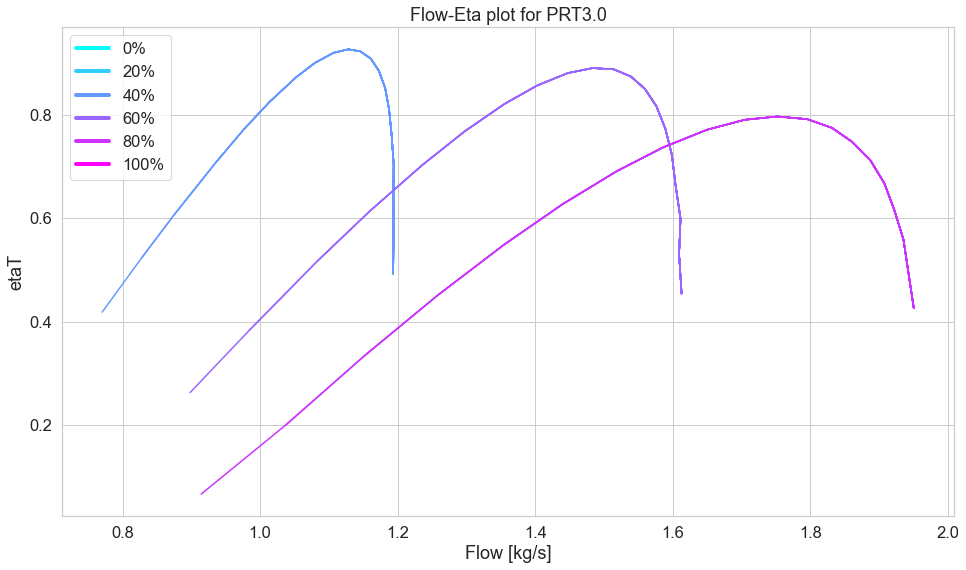

In [4]:
MapTitle='SampleMap_VariableGeometry'
var1='Nozzle'
var2='RPM'
var3='Q'
var4='PRT'
var5='EtaT'

text_plot_all(MapTitle,var1,var2,var3,var4,var5)
text_plot_ind1(MapTitle,var1,var2,var3,var4,var5)
#text_plot_ind2(MapTitle,var1,var2,var3,var4,var5,'60p_all',60,80,'n',0,1)
#text_plot_ind2(MapTitle,var1,var2,var3,var4,var5,'60p_5',50,71,'n',15,20)
text_plot_ind3(MapTitle,var1,var2,var3,var4,var5,'note',10,170)
text_plot_PRT(MapTitle,var1,var2,var3,var4,var5,'note',1.5)
text_plot_PRT(MapTitle,var1,var2,var3,var4,var5,'note',2.0)
text_plot_PRT(MapTitle,var1,var2,var3,var4,var5,'note',2.5)
text_plot_PRT(MapTitle,var1,var2,var3,var4,var5,'note',3.0)


